In [3]:
import keras
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, Dropout
from keras.datasets import mnist
import matplotlib.pyplot as plt
# from keras.utils import np_utils
from keras.optimizers import SGD

In [5]:
!pip install PyDrive

In [6]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [7]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [9]:
train = pd.read_csv('/content/drive/MyDrive/ML/sign_mnist_train.csv')

In [10]:
test = pd.read_csv('/content/drive/MyDrive/ML/sign_mnist_test.csv')

In [11]:
y_train = train['label'].values
y_test = test['label'].values

X_train = train.drop(['label'],axis=1)
X_test = test.drop(['label'], axis=1)

X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [12]:
X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))

In [13]:
classifier = Sequential()
classifier.add(Conv2D(filters=8, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu', data_format='channels_last'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size=(4,4)))
classifier.add(Dense(128, activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(26, activation='softmax'))
classifier.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
275/275 [==============================] - 26s 80ms/step - loss: 2.5694 - accuracy: 0.4818
Epoch 2/50
275/275 [==============================] - 12s 42ms/step - loss: 0.5434 - accuracy: 0.8172
Epoch 3/50
275/275 [==============================] - 9s 34ms/step - loss: 0.3150 - accuracy: 0.8902
Epoch 4/50
275/275 [==============================] - 11s 42ms/step - loss: 0.2359 - accuracy: 0.9191
Epoch 5/50
275/275 [==============================] - 11s 42ms/step - loss: 0.1871 - accuracy: 0.9362
Epoch 6/50
275/275 [==============================] - 11s 41ms/step - loss: 0.1543 - accuracy: 0.9481
Epoch 7/50
275/275 [==============================] - 9s 34ms/step - loss: 0.1371 - accuracy: 0.9510
Epoch 8/50
275/275 [==============================] - 11s 41ms/step - loss: 0.1186 - accuracy: 0.9588
Epoch 9/50
275/275 [==============================] - 11s 41ms/step - loss: 0.1119 - accuracy: 0.9630
Epoch 10/50
275/275 [==============================] - 12s 45ms/step - loss: 0.0907 

In [15]:
accuracy = classifier.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

225/225 [==============================] - 3s 13ms/step - loss: 0.1767 - accuracy: 0.9550
Accuracy:  0.954963743686676


In [16]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 16)          0         
 g2D)                                                            
                                                                 
 dense (Dense)               (None, 3, 3, 128)         2

In [18]:
!pip install pydot graphviz


In [19]:
!pip install keras


In [20]:
!pip install pydot graphviz
!pip install keras


In [22]:
from tensorflow.keras.utils import plot_model

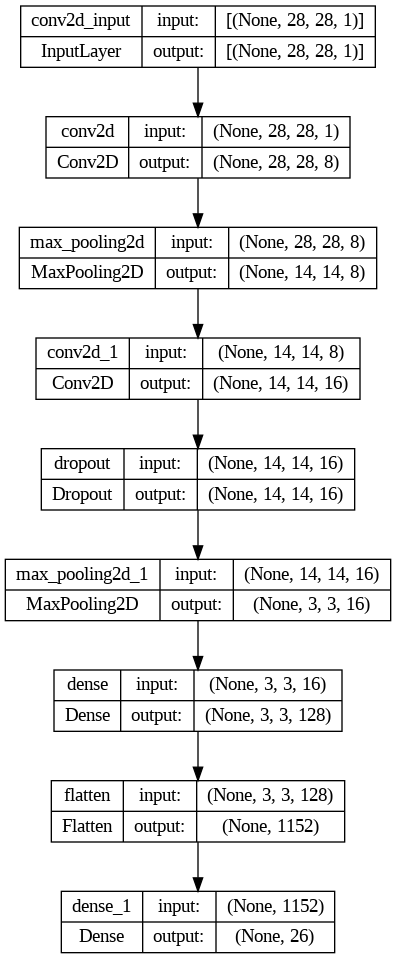

In [24]:
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [25]:
classifier.save('CNNmodel.h5')
weights_file = drive.CreateFile({'title' : 'CNNmodel.h5'})
weights_file.SetContentFile('CNNmodel.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


GoogleDriveFile({'id': '1NjG4gSj-oXNPeB7JCOqTO_vggrGVaA3p'})